In [1]:
# Imports
import matplotlib.pyplot as plt
import maze_dataset as md
import maze_generator.maze_dataset as md
import numpy as np
import DQN.training as trainer
import os
print(os.getcwd())

/home/cody/Documents/DataSciBC/Generative_AI/maze_game


In [2]:
dataset = md.Maze_dataset(1,(3,3))

In [3]:
n_agents = 1
vision = 3
n_episodes =10000
update_factor = 10
len_game = 50
lr = 1e-6
train = trainer.Maze_Training('test',dataset,len_game,n_agents,vision,n_episodes = n_episodes,lr = lr,update_factor=update_factor)
train.train(lambda_entropy=0)
train.save()

/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


episode 45 with loss 1.6565361022949219
episode 99 with loss 4.8485541343688965
episode 150 with loss 2.4687061309814453
episode 201 with loss 0.9629350900650024
episode 253 with loss 1.6972299814224243
episode 301 with loss 4.116231918334961
episode 353 with loss 0.8696237802505493
episode 403 with loss 7.134279727935791
episode 451 with loss 4.083781719207764
episode 501 with loss 4.763924598693848
episode 551 with loss 4.079882621765137
episode 592 with loss 2.4944372177124023
episode 639 with loss 0.8638352155685425


KeyboardInterrupt: 

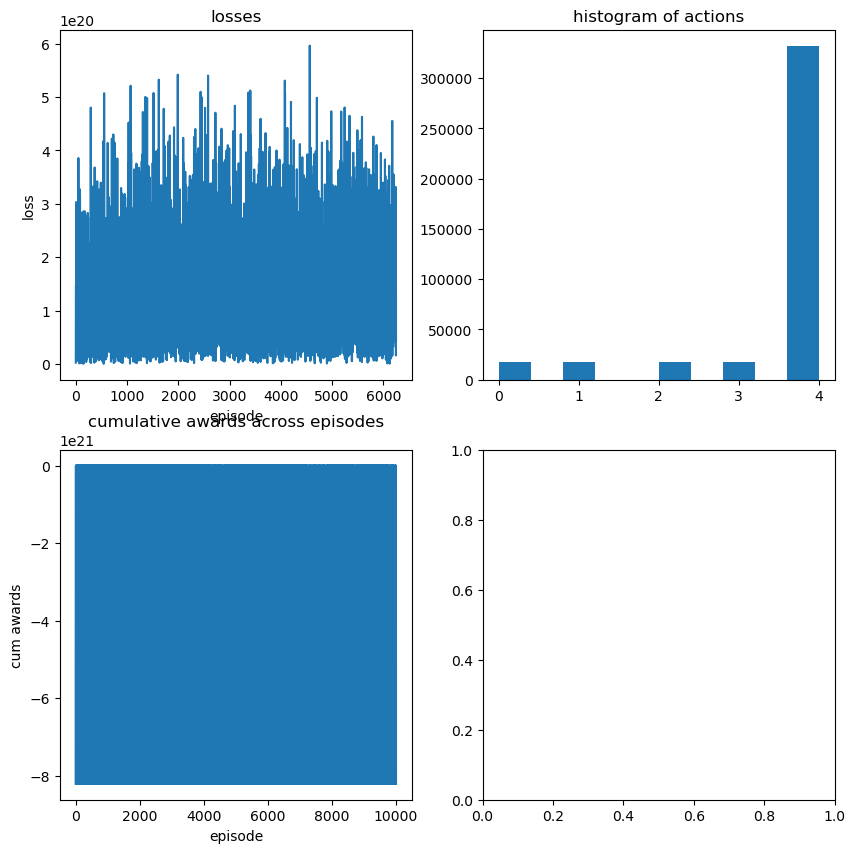

In [4]:
train.results()

In [6]:
train.agents.run_agent(dataset.__getitem__(0),num_agents=1,len_game=50,epsilon=0,sample_prob=False)


/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
cumulative reward: [-8.20208338e+21]


In [19]:
import DQN.agent as agent

load = agent.CNN_Maze_Agents(3)
load.load('version_2')

In [24]:
load.run_agent(dataset.__getitem__(0),len_game=20)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
cumulative reward: [-7.67520157e+08]
